In [6]:
#!pip install ucimlrepo

In [7]:

# data (as pandas dataframes) 
# X = predict_students_dropout_and_academic_success.data.features 
# y = predict_students_dropout_and_academic_success.data.targets 



In [8]:
import pandas as pd 
df = pd.read_csv('files/playground-series-s4e6/train.csv')



In [11]:
# Exibir todas as linhas
pd.set_option('display.max_rows', None)

pd.options.display.float_format = "{:,.6f}".format
# Exibir todas as colunas
pd.set_option('display.max_columns', None)

In [12]:
df.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.000000,1,1,19,5,5,122.600000,0,0,0,1,0,1,18,0,0,6,6,6,14.500000,0,0,6,7,6,12.428571,0,11.100000,0.600000,2.020000,Graduate
1,1,1,17,1,9238,1,1,125.000000,1,19,19,9,9,119.800000,1,0,0,1,0,0,18,0,0,6,8,4,11.600000,0,0,6,9,0,0.000000,0,11.100000,0.600000,2.020000,Dropout
2,2,1,17,2,9254,1,1,137.000000,1,3,19,2,3,144.700000,0,0,0,1,1,0,18,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,16.200000,0.300000,-0.920000,Dropout
3,3,1,1,3,9500,1,1,131.000000,1,19,3,3,2,126.100000,1,0,0,1,0,1,18,0,0,7,9,7,12.591250,0,0,8,11,7,12.820000,0,11.100000,0.600000,2.020000,Enrolled
4,4,1,1,2,9500,1,1,132.000000,1,19,37,4,9,120.100000,1,0,0,1,0,0,18,0,0,7,12,6,12.933333,0,0,7,12,6,12.933333,0,7.600000,2.600000,0.320000,Graduate


In [39]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df.shape

(76518, 38)

In [15]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [17]:
df.isnull().sum()

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

In [18]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

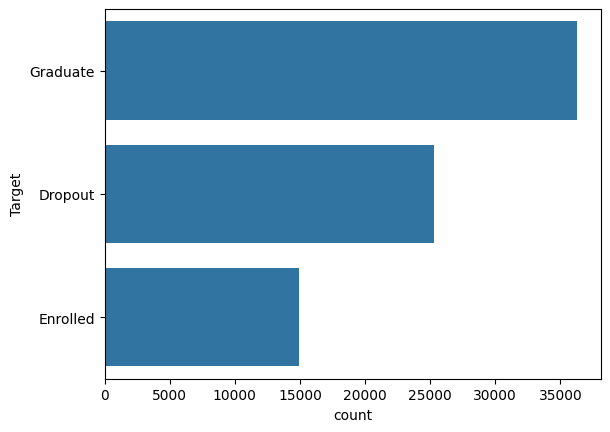

In [19]:
sns.countplot(df['Target']);

In [20]:
df.groupby('Target').size()

Target
Dropout     25296
Enrolled    14940
Graduate    36282
dtype: int64

In [22]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder

In [27]:
mdl_label = LabelEncoder()

df['Target'] = mdl_label.fit_transform(df['Target'])

In [29]:
df.drop('id', axis=1, inplace=True)

In [30]:
df.tail()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
76513,1,17,1,9254,1,1,121.000000,1,19,1,7,5,116.500000,1,0,0,1,0,1,18,0,0,6,9,6,10.666667,0,0,6,8,5,10.600000,0,13.900000,-0.300000,0.790000,2
76514,1,1,6,9254,1,1,125.000000,1,1,38,4,9,131.600000,1,0,0,1,0,0,19,0,0,6,22,4,13.000000,0,0,6,9,6,13.875000,0,9.400000,-0.800000,-3.120000,2
76515,5,17,1,9085,1,1,138.000000,1,37,37,9,10,123.300000,1,0,0,1,0,0,19,0,0,5,13,4,12.500000,2,0,5,8,5,11.400000,1,9.400000,-0.800000,-3.120000,1
76516,1,1,3,9070,1,1,136.000000,1,38,37,5,9,124.800000,1,0,0,1,0,0,18,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,7.600000,2.600000,0.320000,0
76517,1,1,1,9773,1,1,133.100000,1,19,19,4,9,131.000000,1,0,0,1,0,0,19,0,0,6,6,6,12.833333,0,0,6,6,6,13.666667,0,15.500000,2.800000,-4.060000,2


In [31]:

X = df.drop('Target', axis=1)
y = df[['Target']]

In [35]:
mdl_smote = SMOTE(random_state=100)

X_res, y_res = mdl_smote.fit_resample(X,y)


In [38]:
pd.DataFrame(y_res).value_counts()

Target
0         36282
1         36282
2         36282
Name: count, dtype: int64

In [42]:
# Normalizar os dados
mdl_scaler = StandardScaler()
X_scaler = mdl_scaler.fit_transform(X_res)

In [43]:
pd.DataFrame(X_scaler).tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
108841,-0.243010,-0.932383,0.400989,0.084539,0.306910,-0.311615,0.118852,-0.065000,-0.051502,-0.294238,-0.094016,0.002409,0.353963,0.988091,-0.051417,-0.240234,0.391970,-0.635306,-0.468853,-0.481600,-0.073635,-0.151707,-0.487044,0.165663,-0.713664,0.148167,-0.136528,-0.136553,-0.518509,0.192714,-0.236591,0.522189,-0.136680,-1.486141,1.012038,0.191769
108842,2.192593,1.328350,-0.485783,0.553662,-3.258287,-0.311615,-1.108772,-0.065000,1.120973,0.915121,0.014305,0.002409,0.091696,-1.012053,-0.051417,-0.240234,0.391970,-0.635306,-0.468853,1.576746,-0.073635,-0.151707,-0.487044,0.165663,-1.101369,0.235016,-0.136528,-0.136553,-0.518509,0.764623,-0.615324,0.208152,-0.136680,-0.250331,0.122562,0.848068
108843,-0.243010,-0.932383,-0.485783,0.476957,0.306910,-0.311615,-1.350938,-0.065000,1.120973,0.915121,0.014305,0.002409,-1.216611,0.988091,-0.051417,-0.240234,0.391970,-0.635306,-0.468853,-0.334575,-0.073635,-0.151707,0.139866,0.741134,-0.713664,0.626728,-0.136528,-0.136553,0.122915,-0.379195,0.142142,0.535509,-0.136680,0.174904,1.110555,-0.073325
108844,-0.243010,0.019505,-0.485783,0.135120,0.306910,-0.311615,-0.169970,-0.065000,1.120973,0.915121,-0.148177,-0.168294,-0.243470,0.988091,-0.051417,-0.240234,0.391970,-0.635306,-0.468853,-0.481600,-0.073635,-0.151707,0.139866,0.453399,0.061747,0.283601,-0.136528,-0.136553,0.122915,1.050578,0.142142,0.395590,-0.136680,-0.337459,0.047479,0.612774
108845,-0.243010,-0.932383,-0.485783,0.084539,0.306910,-0.311615,0.008989,-0.065000,1.120973,0.915121,-0.148177,-0.111393,-0.203100,0.988091,-0.051417,-0.240234,0.391970,-0.635306,-0.468853,-0.628624,-0.073635,-0.151707,-0.487044,0.741134,-0.325959,0.289116,-0.136528,-0.136553,-0.518509,0.192714,0.142142,0.495289,-0.136680,-0.790998,-1.508144,-1.398138


In [45]:
from sklearn.model_selection import train_test_split

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y_res, test_size=0.3, random_state=42)


In [52]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from sklearn.model_selection import GridSearchCV

In [46]:



param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy')

In [47]:

# Fazer previsões
y_pred = grid.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.6f}")

Acurácia: 0.808722


In [50]:
class_report = classification_report(y_test, y_pred)
print("Relatório de Classificação:")
print(class_report)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84     10881
           1       0.74      0.74      0.74     10779
           2       0.81      0.88      0.84     10994

    accuracy                           0.81     32654
   macro avg       0.81      0.81      0.81     32654
weighted avg       0.81      0.81      0.81     32654



In [53]:
model = LogisticRegressionCV(cv=5, random_state=42)

# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'Cs': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [1, 3, 5, 10]
}

grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/skl

In [ ]:
# Fazer previsões
y_pred = grid.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.6f}")
class_report = classification_report(y_test, y_pred)
print("Relatório de Classificação:")
print(class_report)